# 사물 이진분류 모델 만들기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# /content/drive/MyDrive/[순천]딥러닝 강의/data/cup
# /content/drive/MyDrive/[순천]딥러닝 강의/data/phone
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 이미지를 로드해주는 모듈
# 파이썬 이미지 처리 모듈 PIL(pillow)
from PIL import Image

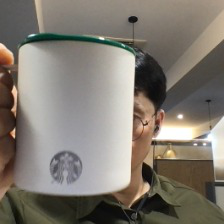

In [ ]:
img = Image.open('/content/drive/MyDrive/[순천]딥러닝 강의/data/cup/0.jpg')
img

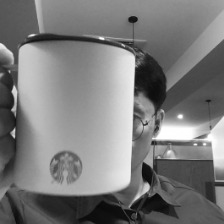

In [ ]:
img = Image.open('/content/drive/MyDrive/[순천]딥러닝 강의/data/cup/0.jpg').convert('L')
img

## 이미지 배역을 넘파이 배열로 변환.
  - 기계가 인식할 수 있도록 이미지 데이터의 픽셀값을 수치로 변환
  - 가로 세로 픽셀 수 만큼 수치로 변환

In [ ]:
img_gray = np.array(img)
img_gray

array([[ 90,  89,  88, ..., 160, 161, 162],
       [ 88,  88,  87, ..., 159, 160, 161],
       [ 86,  87,  87, ..., 158, 160, 161],
       ...,
       [ 84,  82,  81, ...,  90,  87,  84],
       [ 85,  84,  82, ...,  89,  91,  91],
       [ 86,  85,  83, ...,  95,  93,  89]], dtype=uint8)

In [ ]:
img_gray.shape

(224, 224)

## 반복문 실행시 어느정도 실행되고 있는지 %로 알려주는 라이브러리

In [ ]:
from tqdm import tqdm

In [ ]:
# 데이터셋 구성하기

class1_list = [] # cup 0
class2_list = [] # phone 1 

for i in tqdm(range(0,200,1)):
# 경로와 이름에 맞게 이미지를 가져와서 흑백으로 변환후 IMG변수에 담아두기
  img1 = Image.open('/content/drive/MyDrive/[순천]딥러닝 강의/data/cup/'+ str(i) +'.jpg').convert('L')
  img_array1 = np.array(img1)
  class1_list.append(img_array1)

  img2 = Image.open('/content/drive/MyDrive/[순천]딥러닝 강의/data/phone/'+ str(i) +'.jpg').convert('L')
  img_array2 = np.array(img2)
  class2_list.append(img_array2)






100%|██████████| 200/200 [01:32<00:00,  2.17it/s]


In [ ]:
print(type(class1_list),type(class2_list))

<class 'list'> <class 'list'>


In [ ]:
class1_numpy = np.array(class1_list)
class2_numpy = np.array(class2_list)

In [ ]:
type(class1_numpy)

numpy.ndarray

In [ ]:
print(class1_numpy.shape,class2_numpy.shape)

(200, 224, 224) (200, 224, 224)


In [ ]:
# 데이터 연결 class1_numpy + class2_numpy
data = np.concatenate((class1_numpy,class2_numpy))

In [ ]:
data.shape

(400, 224, 224)

In [ ]:
# 정답 데이터 생성(문제와 정답 순서를 일정하게 맞춰줘야 합니다.)
# 0:컵 , 1:핸드폰
target = np.array([0]*200 + [1]*200)

In [ ]:
np.array([0]*200)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [ ]:
np.array([1]*200)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [ ]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
print(data.shape,target.shape)

(400, 224, 224) (400,)


In [ ]:
# 데이터 나누기 (training / test set )
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.2, random_state=10)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(320, 224, 224)
(80, 224, 224)
(320,)
(80,)


In [ ]:
X_train = X_train.reshape(X_train.shape[0], 224,224,1)
X_test = X_test.reshape(X_test.shape[0], 224,224,1)

In [ ]:
print(X_train.shape, X_test.shape)

(320, 224, 224, 1) (80, 224, 224, 1)


In [ ]:
print(Y_test.shape, Y_test)

(80,) [1 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 1 0 1 1 1 1 0 0 0 0 1 0 1
 1 0 0 0 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0
 0 1 0 0 0 0]


## 신경망 모델링

training / validation / test

In [ ]:
X_train, X_val, Y_train,Y_val = train_test_split(X_train, Y_train, random_state=10)

In [ ]:
print(X_val.shape, Y_val)

(80, 224, 224, 1) [1 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 1
 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 1
 0 0 0 1 0 1]


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D,MaxPooling2D

model = Sequential()
## INPUT CNN
model.add(Conv2D(32,(3,3), padding='same', activation='relu', input_shape=(224,224,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
## MLP
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
## OUTPUT
model.add(Dense(1, activation='sigmoid'))

model.summary()






Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 56, 56, 64)        0         
                                                                 
 flatten (Flatten)           (None, 200704)            0

In [ ]:
model.compile(loss='binary_crossentropy' , optimizer='adam', metrics=['accuracy'])

In [ ]:
# 텐서보드 만들어 주세요


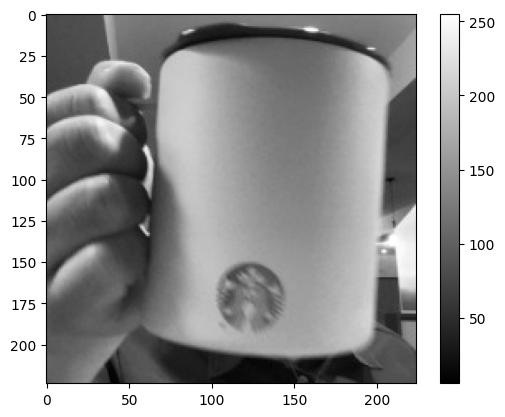

0


In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_val[1], cmap='gray')
plt.colorbar()
plt.show()
print(Y_val[1])